In [ ]:
pip install nltk

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from nltk.corpus import stopwords
from pprint import pprint
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df=pd.read_excel('CB Data.xlsx')

In [ ]:
df

,Anime Title,Type,Episodes,Score,Members,Favorites,Genres,Summary
0,Fullmetal Alchemist: Brotherhood,TV,64,9.22,2025613,167812,"Action, Military, Adventure, Comedy, Drama, Ma...","""In order for something to be obtained, someth..."
1,Steins;Gate,TV,24,9.12,1636151,139909,"Thriller, Sci-Fi",The self-proclaimed mad scientist Rintarou Oka...
2,Gintama??,TV,51,9.11,363879,10353,"Action, Comedy, Historical, Parody, Samurai, S...","Gintoki, Shinpachi, and Kagura return as the f..."
3,Hunter x Hunter (2011),TV,148,9.11,1459320,130492,"Action, Adventure, Fantasy, Shounen, Super Power",Hunter x Hunter is set in a world where Hunter...
4,Ginga Eiyuu Densetsu,OVA,110,9.10,212162,13100,"Military, Sci-Fi, Space, Drama",The 150-year-long stalemate between the two in...
...,...,...,...,...,...,...,...,...
9995,Roba Chotto Suneta,Music,1,5.24,255,0,"Kids, Music",A music video for the song by Agnes Chan that ...
9996,Ski Jumping Pairs: Road to Torino 2006,Movie,1,5.24,370,1,"Comedy, Sports",A CG animated film by Riichiro Mashima.\n\r\nA...
9997,Tentoumushi no Otomurai,Movie,1,5.24,494,2,"Music, Dementia","The story of the animation begins from a girl,..."
9998,The Baby Birds of Norman McLaren,Movie,1,5.24,452,0,Music,Celebrating the 100th year of birth of Norman ...


# EDA

In [ ]:
df.info()
#most datatypes are correct,but episode is not int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Anime Title  10000 non-null  object 
 1   Type         10000 non-null  object 
 2   Episodes     10000 non-null  object 
 3   Score        10000 non-null  float64
 4   Members      10000 non-null  int64  
 5   Favorites    10000 non-null  int64  
 6   Genres       10000 non-null  object 
 7   Summary      10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [ ]:
df.describe()
#mean score is 6.7,min score is 5.24,max score is 9.22

,Score,Members,Favorites
count,10000.000000,1.000000e+04,10000.000000
mean,6.707833,5.417796e+04,717.503900
std,0.763715,1.462541e+05,4844.106062
min,5.240000,1.690000e+02,0.000000
25%,6.140000,1.704000e+03,2.000000
50%,6.670000,7.221000e+03,12.000000
75%,7.260000,3.720600e+04,100.250000
max,9.220000,2.331023e+06,167812.000000


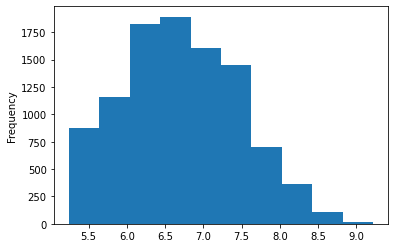

In [ ]:
df['Score'].plot.hist()
#score is right skewed with some extreme high score
#most score concentrate in 6-6.5

In [ ]:
df['Episodes'].value_counts()
#most anime have fewer than 50 episodes

1      4278
12     1234
13      626
2       506
26      415
       ... 
163       1
164       1
167       1
172       1
93        1
Name: Episodes, Length: 174, dtype: int64

In [ ]:
df['Type'].value_counts()
#most anime broadcast on TV

TV         3681
Movie      1693
Special    1636
OVA        1567
ONA         868
Music       555
Name: Type, dtype: int64

# Data Preprocessing

In [ ]:
#delete some abnormal value in title due to web scrapping error
df.loc[:,'Anime Title']=df['Anime Title'].astype(str).apply(lambda x:x.strip('?\'').replace('?','').replace('\'','').replace('.',''))

In [ ]:
df[df.duplicated()]

,Anime Title,Type,Episodes,Score,Members,Favorites,Genres,Summary
8175,Himitsu no Akko-chan: Umi da! Obake da!! Natsu...,Movie,1,5.91,421,0,"Magic, Shoujo",Everybody goes to the ocean for a summer festi...


In [ ]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]
#no duplicated value

,Anime Title,Type,Episodes,Score,Members,Favorites,Genres,Summary


In [ ]:
df.isnull().sum()
#no missing value

Anime Title    0
Type           0
Episodes       0
Score          0
Members        0
Favorites      0
Genres         0
Summary        0
dtype: int64

In [ ]:
df['Episodes'].unique()
#episode has 'unknown' values beside integer

array([64, 24, 51, 148, 110, 10, 13, 22, 1, 12, 201, 7, 25, 14, 26, 75,
       74, 4, 11, 43, 47, 27, 39, 37, 101, 99, 23, 15, 'Unknown', 120, 50,
       2, 112, 62, 8, 6, 52, 1787, 19, 9, 195, 21, 46, 78, 20, 3, 40, 142,
       100, 45, 72, 61, 49, 42, 48, 17, 36, 147, 73, 127, 5, 150, 16, 29,
       115, 30, 53, 76, 124, 224, 18, 140, 131, 33, 94, 79, 77, 203, 96,
       154, 58, 35, 44, 34, 67, 178, 276, 172, 128, 102, 93, 41, 86, 92,
       105, 97, 38, 330, 137, 91, 191, 59, 60, 65, 180, 243, 55, 66, 192,
       193, 153, 104, 56, 54, 291, 70, 500, 28, 63, 103, 109, 32, 258,
       296, 80, 146, 182, 694, 68, 117, 114, 108, 69, 145, 220, 31, 331,
       130, 170, 214, 151, 95, 164, 87, 89, 83, 119, 526, 84, 88, 156,
       167, 113, 366, 155, 143, 136, 305, 200, 726, 300, 139, 1471, 163,
       161, 373, 358, 175, 1006, 1565, 1428, 237, 1818, 365], dtype=object)

In [ ]:
#use episode mean to fill in unknown value
emean=df[df['Episodes']!='Unknown']['Episodes'].mean().astype(int)
df.loc[df['Episodes']=='Unknown','Episodes']=emean
df['Episodes']=df['Episodes'].astype(int)

In [ ]:
#change the type into dummy variable
df = pd.concat([df.drop('Type', axis=1), pd.get_dummies(df['Type'])], axis=1)

In [ ]:
#put genres into dummy variable
df.loc[:,'Genres']=df['Genres'].apply(lambda x:x.split(', '))

In [ ]:
#extract first 100 animes
genrelist=[]
for i in df.sort_values(by='Favorites',ascending=False).loc[0:100,'Genres']:
  genrelist.extend(i)
genrelist[:15]

['Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Thriller',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Shounen',
 'Super Power']

[('Action', 28), ('Comedy', 21), ('Drama', 20), ('Shounen', 19), ('Supernatural', 16), ('Adventure', 15), ('Fantasy', 14), ('Super Power', 13), ('Sci-Fi', 10), ('School', 10), ('Mystery', 9), ('Psychological', 8), ('Romance', 7), ('Military', 5), ('Magic', 5), ('Thriller', 5), ('Mecha', 4), ('Slice of Life', 4), ('Martial Arts', 3), ('Parody', 3), ('Historical', 3), ('Police', 2), ('Game', 2), ('Samurai', 2), ('Ecchi', 2), ('Seinen', 2), ('Music', 1), ('Dementia', 1), ('Space', 1), ('Sports', 1), ('Horror', 1), ('Demons', 1), ('Vampire', 1), ('Harem', 1), ('Shoujo', 1)]


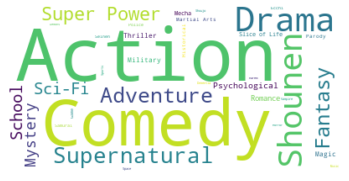

In [ ]:
fd = nltk.FreqDist(genrelist)
print(fd.most_common(50))
#the most common genres are comedy, action and fantasy

wc_job = WordCloud(background_color="white").generate_from_frequencies(fd)
plt.imshow(wc_job, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df1=pd.DataFrame(columns=['word','freq'])
a=0
for i in fd.most_common(40):
  df1.loc[a,'word']=i[0]
  df1.loc[a,'freq']=i[1]
  a+=1
df1

,word,freq
0,Action,28
1,Comedy,21
2,Drama,20
3,Shounen,19
4,Supernatural,16
5,Adventure,15
6,Fantasy,14
7,Super Power,13
8,Sci-Fi,10
9,School,10


In [ ]:
df1.to_excel('top100_genrelist.xlsx')

In [ ]:
df = pd.concat([df.drop('Genres', axis=1), df['Genres'].str.join('|').str.get_dummies()], axis=1)
df.head(3)

,Anime Title,Episodes,Score,Members,Favorites,Summary,Movie,Music,ONA,OVA,Special,TV,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,No genres have,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,Fullmetal Alchemist: Brotherhood,64,9.22,2025613,167812,"""In order for something to be obtained, someth...",0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Steins;Gate,24,9.12,1636151,139909,The self-proclaimed mad scientist Rintarou Oka...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Gintama,51,9.11,363879,10353,"Gintoki, Shinpachi, and Kagura return as the f...",0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


# Recommend with genres and numerical values

In [ ]:
#decide the anime to find other similar animes
animeid_to_recom=1

In [ ]:
#build model only with numerical value
drop=['Anime Title','Summary']
df1=df.drop(drop,axis=1)
df1

,Episodes,Score,Members,Favorites,Movie,Music,ONA,OVA,Special,TV,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,No genres have,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,64,9.22,2025613,167812,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,24,9.12,1636151,139909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,51,9.11,363879,10353,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,148,9.11,1459320,130492,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,110,9.10,212162,13100,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,5.24,255,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,1,5.24,370,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9997,1,5.24,494,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,1,5.24,452,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Need to scale data if we measure the distance among animes
scaler = MinMaxScaler()
scaled_df1=scaler.fit_transform(df1)
scaled_df1[0]

array([0.03467254, 1.        , 0.86897077, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
# KNN for every anime will find 2 nearest animes with it
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(scaled_df1)
distances, indices = nbrs.kneighbors(scaled_df1)
print(indices[1])
print(distances[1])
indices

[   1   90 3757]
[0.         0.92732402 1.56959834]


array([[   0, 1028, 8540],
       [   1,   90, 3757],
       [   2,    5,    7],
       ...,
       [9996, 9555, 9478],
       [9997, 9557, 9222],
       [9998, 4675,  803]])

In [ ]:
def showResults(qind):
  result=pd.DataFrame(columns=['id','distance','title','summary'])
  a=0
  for i, d in zip(indices[qind], distances[qind]) :
    #print(str(i) + '\t' + str(d) + '\t' + test.loc[i, 'id'] + '\t' + test.loc[i, 'title'])
    #print(test.loc[i, 'overview'])
    result.loc[a,'id']=str(i)
    result.loc[a,'distance']=str(d)
    result.loc[a,'title']=df['Anime Title'][i]
    result.loc[a,'summary']=df['Summary'][i]
    a+=1
  return result

In [ ]:
result1=showResults(animeid_to_recom)
result1=result1.loc[1:,:]
result1

,id,distance,title,summary
1,90,0.9273240211990653,Steins;Gate 0,"The eccentric, self-proclaimed mad scientist R..."
2,3757,1.5695983412857117,Seikaisuru Kado,"Cool-headed and rational, Kojirou Shindou is a..."


# Recommend with summary

In [ ]:
#pre-process summary text
df['Summary'][:5]
df['Summary'] = df['Summary'].astype(str)
len_overview = [ len(s.split(' ')) for s in df['Summary'] ]
print(len_overview[:30])

[224, 179, 186, 166, 152, 162, 133, 149, 156, 159, 145, 157, 137, 173, 148, 115, 136, 134, 111, 8, 136, 183, 8, 170, 113, 175, 77, 142, 160, 165]


(array([1.834e+03, 1.215e+03, 9.100e+02, 9.100e+02, 8.530e+02, 7.400e+02,
        6.330e+02, 5.200e+02, 5.230e+02, 5.240e+02, 5.040e+02, 3.190e+02,
        2.180e+02, 1.340e+02, 6.200e+01, 3.400e+01, 1.400e+01, 1.800e+01,
        9.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  2.        ,  17.36666667,  32.73333333,  48.1       ,
         63.46666667,  78.83333333,  94.2       , 109.56666667,
        124.93333333, 140.3       , 155.66666667, 171.03333333,
        186.4       , 201.76666667, 217.13333333, 232.5       ,
        247.86666667, 263.23333333, 278.6       , 293.96666667,
        309.33333333, 324.7       , 340.06666667, 355.43333333,
        370.8       , 386.16666667, 401.53333333, 416.9       ,
        432.26666667, 447.63333333, 463.        ]),
 <a list of 30 Patch objects>)

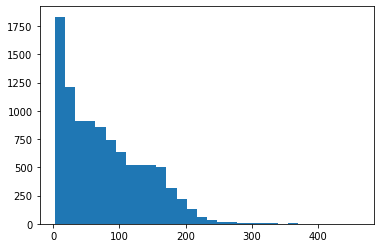

In [ ]:
plt.hist(len_overview, bins = 30)
#most summary fewer than 100 words

In [ ]:
#check the summary with least words
aa=pd.concat([df['Summary'],pd.DataFrame(len_overview)],axis=1)
aa[aa[0]==min(len_overview)].head(10)
#aa[aa[0]==min(len_overview)+1]
#though short words still make sense, so we don't remove them

,Summary,0
1713,Tegamibachi specials.,2.0
1907,DVD/BD Extras.,2.0
3346,Recap episode.,2.0
3370,DVD specials.,2.0
3549,Second season.,2.0
3664,Second season.,2.0
4096,Special episode.,2.0
4464,Ikkitousen OVA.,2.0
4513,DVD/BD extra.,2.0
4939,DVD/BD Specials,2.0


In [ ]:
mystopwords=stopwords.words("english") + ['one', 'become', 'get', 'make', 'take','a.m.','p.m.','something','anything','Written','by','MAL','Rewrite','[',']']
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    tokens=[ t for t in tokens if t not in mystopwords]
    tokens = [ t for t in tokens if len(t) >= 3 ]
    tokens=[ t for t in tokens if not t.isnumeric()]
    text_after_process=" ".join(tokens)
    return(text_after_process)

text = df['Summary']
toks = text.apply(pre_process)
toks

0       order obtained equal value must lost alchemy b...
1       self-proclaimed mad scientist rintarou okabe r...
2       gintoki shinpachi kagura return fun-loving bro...
3       hunter hunter set world hunter exist perform m...
4       150-year-long stalemate two interstellar super...
                              ...                        
9995    music video song agnes chan featured nhk minna...
9996    animated film riichiro mashima new breed ski j...
9997    story animation begin girl named eiko mistaken...
9998    celebrating 100th year birth norman mclaren sh...
9999    normal looking high school girl outside kusaka...
Name: Summary, Length: 9999, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8,max_features=2500,min_df=3,stop_words=mystopwords,use_idf=True)
vec_overview = vectorizer.fit_transform(toks)
vec_overview.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mal', 'rewrite', 'written'] not in stop_words.
  % sorted(inconsistent)


(9999, 2500)

In [ ]:
def findAnime(q, k): #avoid too big data to crash colab. same principle with genres processing
    result=pd.DataFrame(columns=['id','sim','title','summary'])
    a=0
    vals = cosine_similarity(vec_overview[q], vec_overview)
    #print(vals)
    idx_asc = vals.argsort()[0][-k:] #get index of highest similarity values
    idx_dsc = idx_asc[::-1] #start at the end; count down to the beginning. if not specify the start and end point, then one step back each time
    #print(idx_dsc)
    flatv = np.sort(vals[0])
    vk_asc = flatv[-k:]
    vk_dsc = vk_asc[::-1] #reverse the list
    if(vk_dsc[0]==0):
        print("No similar movie is found")
    else:
        for v, i in zip(vk_dsc, idx_dsc): #v for similarity value
            result.loc[a,'id']=str(i)
            result.loc[a,'sim']=str(v)
            result.loc[a,'title']=df['Anime Title'][i]
            result.loc[a,'summary']=df['Summary'][i]
            a+=1
    return result

In [ ]:
result2=findAnime(animeid_to_recom, 3)
result2=result2.loc[1:,:]
result2

,id,sim,title,summary
1,1346,0.19415161288718533,Rikei ga Koi ni Ochita no de Shoumei shitemita,It is widely believed that science can provide...
2,8921,0.17945826093055675,Garo: Guren no Tsuki - Yurugaro,Omake specials that feature the cast of Garo: ...


In [ ]:
#combine the 2 results together
resultall=pd.concat([result1,result2],axis=0)
resultall.set_index(np.arange(4),inplace=True)
resultall.drop(['distance','sim'],axis=1,inplace=True)
resultall.drop_duplicates(inplace=True)
resultall

,id,title,summary
0,90,Steins;Gate 0,"The eccentric, self-proclaimed mad scientist R..."
1,3757,Seikaisuru Kado,"Cool-headed and rational, Kojirou Shindou is a..."
2,1346,Rikei ga Koi ni Ochita no de Shoumei shitemita,It is widely believed that science can provide...
3,8921,Garo: Guren no Tsuki - Yurugaro,Omake specials that feature the cast of Garo: ...
